# PSYCH8K Dataset Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as pl
from collections import Counter
import nltk
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
# Download NLTK stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/grant/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
data = pd.read_json('Alexander_Street_shareGPT_2.0.json')
data.head()

,instruction,input,output
0,"If you are a counsellor, please answer the que...","Lately, I've been feeling really disconnected ...",Thank you for sharing your experience with me....
1,"If you are a counsellor, please answer the que...","Lately, I've been feeling really stressed and ...",Thank you for sharing your experience with me....
2,"If you are a counsellor, please answer the que...","Lately, I've been feeling a bit off. I sometim...",I appreciate you sharing your concerns with me...
3,"If you are a counsellor, please answer the que...","Lately, I've been feeling a bit off. I've noti...",Thank you for sharing your feelings and experi...
4,"If you are a counsellor, please answer the que...","Lately, I've been feeling quite off. I have be...",I appreciate you sharing your experiences with...


In [4]:
# Convert to DataFrame
df = pd.DataFrame(data)

In [5]:
# Display basic information about the dataset
df_info = df.info()
df_head = df.head()

df_info, df_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8187 entries, 0 to 8186
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   instruction  8187 non-null   object
 1   input        8187 non-null   object
 2   output       8187 non-null   object
dtypes: object(3)
memory usage: 192.0+ KB


(None,
                                          instruction  \
 0  If you are a counsellor, please answer the que...   
 1  If you are a counsellor, please answer the que...   
 2  If you are a counsellor, please answer the que...   
 3  If you are a counsellor, please answer the que...   
 4  If you are a counsellor, please answer the que...   
 
                                                input  \
 0  Lately, I've been feeling really disconnected ...   
 1  Lately, I've been feeling really stressed and ...   
 2  Lately, I've been feeling a bit off. I sometim...   
 3  Lately, I've been feeling a bit off. I've noti...   
 4  Lately, I've been feeling quite off. I have be...   
 
                                               output  
 0  Thank you for sharing your experience with me....  
 1  Thank you for sharing your experience with me....  
 2  I appreciate you sharing your concerns with me...  
 3  Thank you for sharing your feelings and experi...  
 4  I appreciate you shar

## Summary of the Dataset
### The dataset contains 8187 entries with three columns:

1. instruction: The instruction given to a counsellor.
2. input: The description of the patient's issue.
3. output: The counsellor's response.

All columns are of type object and none have null values.


## 1. Basic Statistics and Insights

In [6]:
# Display the first few rows
df_head

,instruction,input,output
0,"If you are a counsellor, please answer the que...","Lately, I've been feeling really disconnected ...",Thank you for sharing your experience with me....
1,"If you are a counsellor, please answer the que...","Lately, I've been feeling really stressed and ...",Thank you for sharing your experience with me....
2,"If you are a counsellor, please answer the que...","Lately, I've been feeling a bit off. I sometim...",I appreciate you sharing your concerns with me...
3,"If you are a counsellor, please answer the que...","Lately, I've been feeling a bit off. I've noti...",Thank you for sharing your feelings and experi...
4,"If you are a counsellor, please answer the que...","Lately, I've been feeling quite off. I have be...",I appreciate you sharing your experiences with...


## 2.Data Cleaning 

In [7]:
# Check for duplicates
duplicates = df.duplicated().sum()

# Remove duplicates
df_cleaned = df.drop_duplicates()

# Check for any missing values (though the initial check showed none)
missing_values = df_cleaned.isnull().sum()

duplicates, missing_values

(0,
 instruction    0
 input          0
 output         0
 dtype: int64)

## 3. Text Length Analysis

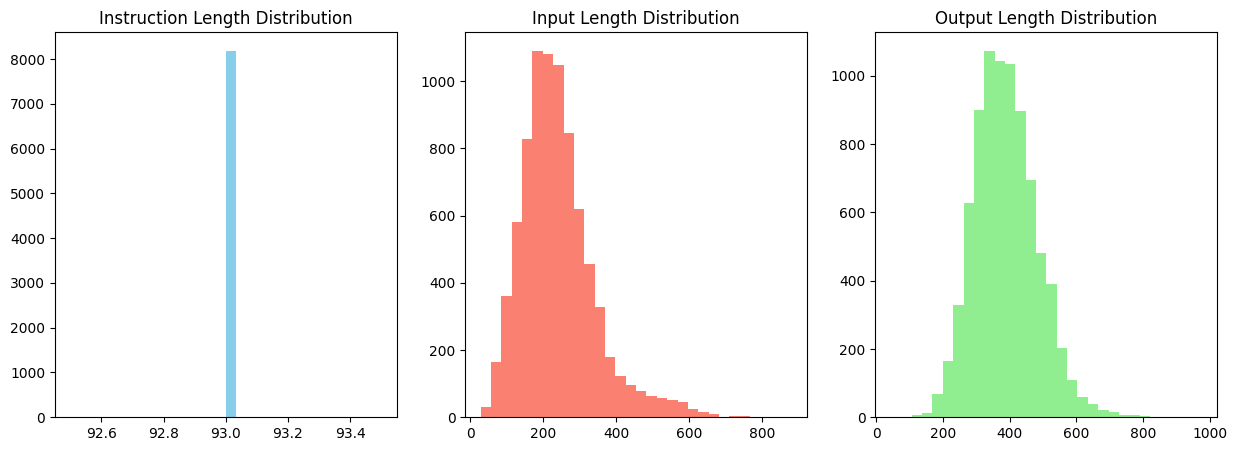

In [8]:
# Calculate text lengths
df_cleaned['instruction_length'] = df_cleaned['instruction'].apply(len)
df_cleaned['input_length'] = df_cleaned['input'].apply(len)
df_cleaned['output_length'] = df_cleaned['output'].apply(len)

# Plot histograms for text lengths
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df_cleaned['instruction_length'], bins=30, color='skyblue')
plt.title('Instruction Length Distribution')

plt.subplot(1, 3, 2)
plt.hist(df_cleaned['input_length'], bins=30, color='salmon')
plt.title('Input Length Distribution')

plt.subplot(1, 3, 3)
plt.hist(df_cleaned['output_length'], bins=30, color='lightgreen')
plt.title('Output Length Distribution')

plt.show()

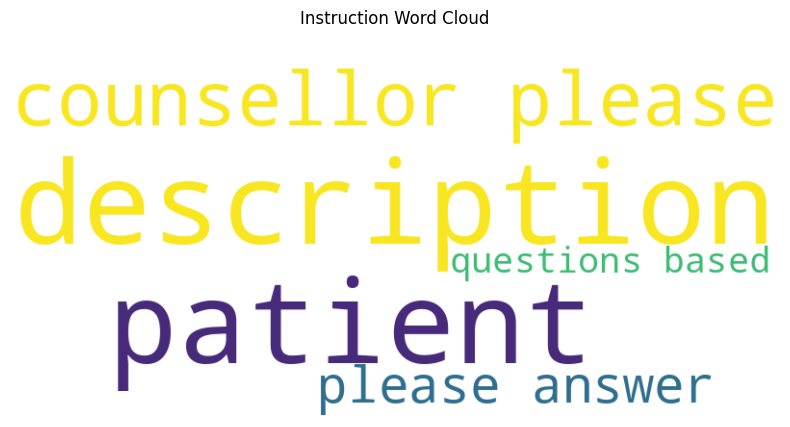

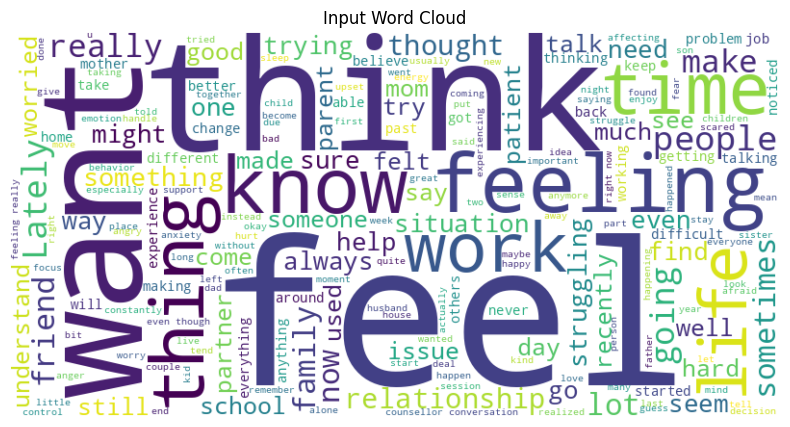

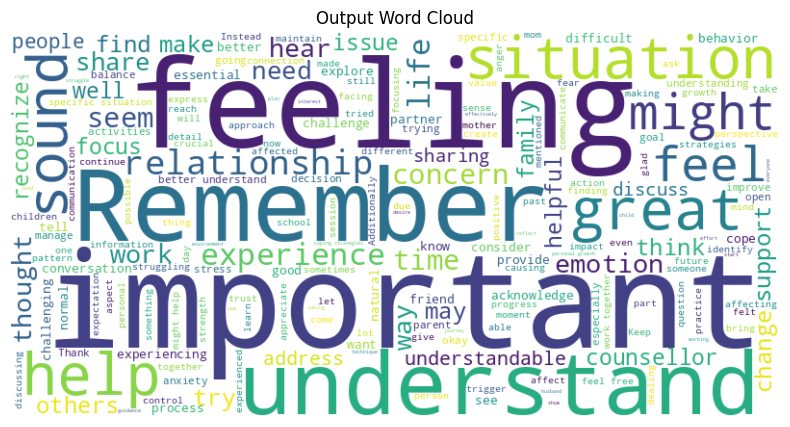

In [9]:
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Combine all text in each column
instruction_text = ' '.join(df_cleaned['instruction'].values)
input_text = ' '.join(df_cleaned['input'].values)
output_text = ' '.join(df_cleaned['output'].values)

# Generate word clouds
generate_wordcloud(instruction_text, 'Instruction Word Cloud')
generate_wordcloud(input_text, 'Input Word Cloud')
generate_wordcloud(output_text, 'Output Word Cloud')

### Text Length Analysis Summary
1. Instruction Length Distribution:
    - The instructions have a consistent length because they all contain the same text.
2. Input Length Distribution:   
    - The inputs vary widely in length, reflecting the diverse ways people describe their experiences.
3. Output Length Distribution:
    - The outputs also show variation in length, which is expected as the responses are tailored to the inputs.

- Instruction Word Cloud:
    - Shows the words used in the instructions. Common words like "counsellor", "please", "answer" are prominent.
- Input Word Cloud:
    - Highlights frequently used words in the inputs. Words like "feel", "like", "think" stand out.
- Output Word Cloud:
    - Displays common words in the responses. Words like "feel", "important", "understand" are prominent.

## Vocabulary Analysis